In [113]:
import tensorflow as tf
import os

In [114]:
import cv2


In [115]:
import numpy as np
from matplotlib import pyplot as plt

# Load Data

In [137]:
data = tf.keras.utils.image_dataset_from_directory('data')
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

Found 2023 files belonging to 2 classes.


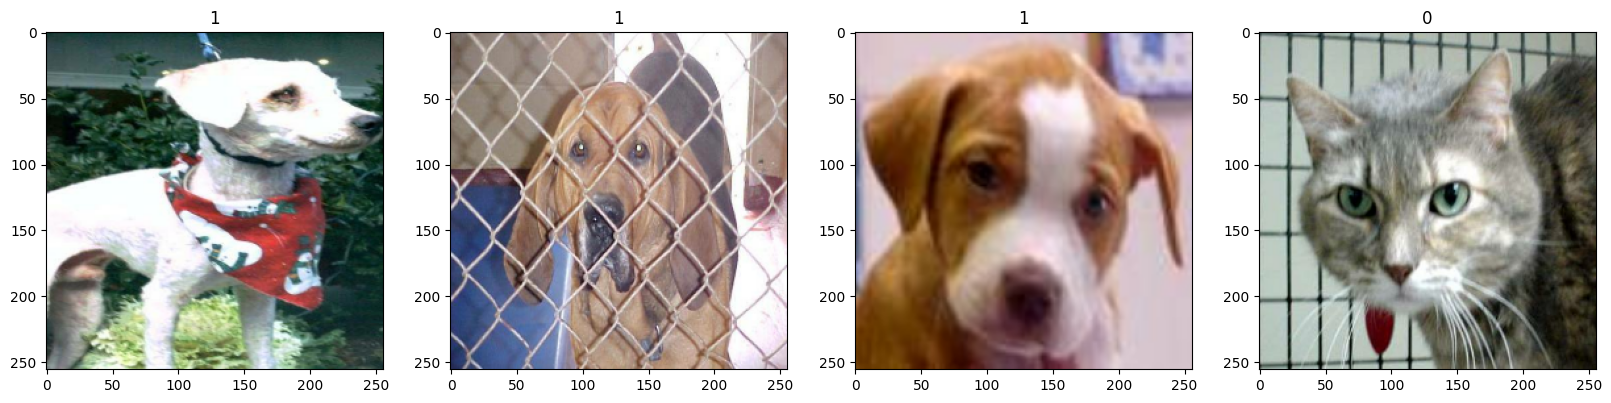

In [138]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Scaling and Splitting

In [139]:
def preprocess (x,y):
    x=x/255
    return (x,y)

In [140]:
data=data.map(preprocess)

In [141]:
data = data.shuffle(buffer_size=1000, seed=42)

In [142]:
total_size = len(data)
train_size = int(total_size * 0.7)
val_size = int(total_size * 0.2)
test_size = total_size - train_size - val_size

In [143]:

# Split the dataset
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

# Print dataset sizes
print("Train size:", sum(1 for _ in train))
print("Validation size:", sum(1 for _ in val))
print("Test size:", sum(1 for _ in test))

Train size: 44
Validation size: 12
Test size: 8


# Model Training

In [144]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [145]:
model= Sequential()


In [146]:
model.add(Conv2D(30,(4,4),1, activation='relu', input_shape=(256,256,3)))
model.add( MaxPooling2D())
model.add(Conv2D(30,(4,4),1, activation='relu'))
model.add( MaxPooling2D())
model.add(Conv2D(30,(4,4),1, activation='relu'))
model.add( MaxPooling2D())
model.add( Flatten() )
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [147]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 253, 253, 30)        │           1,470 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 126, 126, 30)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 123, 123, 30)        │          14,430 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 61, 61, 30)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 58, 58, 30)          │          14,430 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 29, 29, 30)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 25230)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │       6,459,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,489,723 (24.76 MB)

 Trainable params: 6,489,723 (24.76 MB)

 Non-trainable params: 0 (0.00 B)

In [148]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [149]:
hist = model.fit(train, epochs=20, validation_data=val)

Epoch 1/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.5114 - loss: 0.7419 - val_accuracy: 0.5026 - val_loss: 0.6915
Epoch 2/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.5368 - loss: 0.6917 - val_accuracy: 0.5850 - val_loss: 0.6733
Epoch 3/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.6492 - loss: 0.6627 - val_accuracy: 0.6302 - val_loss: 0.6318
Epoch 4/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.6490 - loss: 0.6384 - val_accuracy: 0.6953 - val_loss: 0.6236
Epoch 5/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.6864 - loss: 0.5967 - val_accuracy: 0.7188 - val_loss: 0.5465
Epoch 6/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.7364 - loss: 0.5476 - val_accuracy: 0.7911 - val_loss: 0.4705
Epoch 7/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.7981 - loss: 0.4566 - val_accuracy: 0.8776 - val_loss: 0.3498
Epoch 8/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.8461 - loss: 0.3541 - val_accuracy: 0.9245 - val_loss:

In [150]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [151]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [152]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)
print(pre.result(), re.result(), acc.result())    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step
tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# Evaluation

In [153]:
import cv2

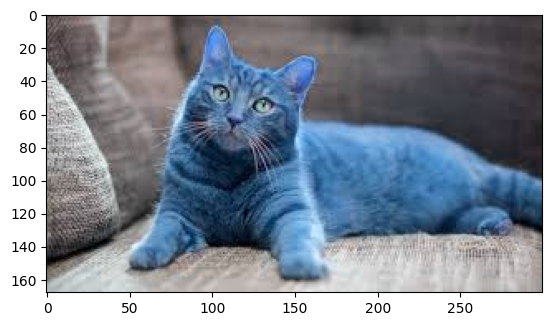

In [181]:
img = cv2.imread('download (3).jfif')
plt.imshow(img)
plt.show()


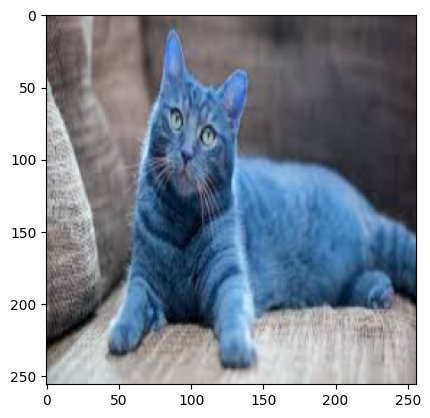

In [182]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [183]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


In [184]:
print(yhat)

[[0.44837904]]


In [185]:
if yhat > 0.5: 
    print(f'Predicted class is Dog')
else:
    print(f'Predicted class is Cat')

Predicted class is Cat
